<h1> Soal 1: Pemahaman Tentang Model Evaluasi</h1>

Jawab pertanyaan di bawah ini dengan bahasa masing-masing?

1. Apa perbedaan antara data latih, data validasi, dan data test?
2. Bagaimana cara kita menilai performa suatu model?
3. Apa itu Confusion Matrix? Jelaskan secara lengkap!
4. Apa itu Classification Report dari sklearn?

Jawab:
1. Data latih merupakan data yang digunakan untuk membentuk model, data validasi merupakan data yang digunakan untuk mengecek seberapa baik model yang telah dibuat, sedangkan data testing merupakan data yang digunakan untuk mengetes model dan merupakan simulasi penerapan model dalam di dunia nyata, data testing merupakan data yang baru yang belum pernah digunakan untuk training maupun validasi

2. Evaluasi terhadap model dapat dilakukan dengan menggunakan metrics accurracy 

3. Confussion matrix merupakan tabel matriks yang digunakan untuk menilai kinerja sebuah model terhadap data uji dimana nilai sebenarnya dari data uji tersebut sudah diketahui. Interpretasi hasil dari confussion matrix dibagi menjadi 4, yaitu TRUE FOSITIVE (TP), TRUE NEGATIVE (TN), FALSE POSITIVE (FP), dan FALSE NEGATIVE (FN)

4. Classification report menampilkan nilai precision, recall, f1, dan support score dari sebuah model 

<h1>Soal 2: Aplikasi Model Evaluasi</h1>

Kali ini kita akan menggunakan data untuk memprediksi kelangsungan hidup pasien yang telah mengalami operasi payudara. Dengan informasi yang dimiliki terkait pasien, kita akan membuat model untuk memprediksi apakah pasien akan bertahan hidup dalam waktu lebih dari 5 tahun atau tidak.

Lebih Lengkapnya kalian bisa membaca informasi tentang dataset di link berikut: https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.names

Buat model Klasifikasi (Model/Algoritma Bebas) untuk memprediksi status pasien dengan ketentuan sebagai berikut:

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
3. Pelajar tentang metrics roc_auc_score kemudian buatlah model dan evaluasi dengan menggunakan teknik cross-validation dengan scoring 'roc_auc'. Baca https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html untuk menggunakan metric roc_auc saat cross-validation.
3. Berapa score rata2 dari model dengan teknik cross-validation tersebut?
4. Prediksi data test dengan model yang telah kalian buat!
5. Bagaimana hasil confusion matrix dari hasil prediksi tersebut?
6. Bagaimana classification report dari hasil prediksi tersebut?
5. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive?
6. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif?

In [82]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [83]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [84]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [85]:
# Code here
#memisahkan label dan variabe prediktor

X = df.drop('survival_status', axis=1)
y = df['survival_status']


#membagi data menjadi dua bagian untuk training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21, stratify = y)


In [86]:
#Membuat model KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5 , weights = 'uniform')

#menghitung cross val score
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(knn, X, y, cv= 5)
cv_results.mean()

print('score rata-rata model adalah:', cv_results.mean())

score rata-rata model adalah: 0.7286620835536752


In [87]:
#melakukan prediksi data tes
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [88]:
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

confusion_matrix(y_test, y_pred, labels=[1,2])


array([[47, 10],
       [14,  6]])

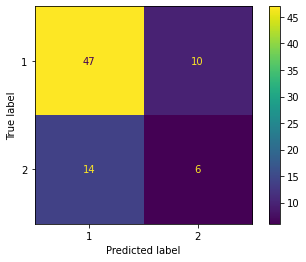

In [89]:
plot_confusion_matrix(knn, X_test, y_test,  labels=[1,2])

In [101]:
TP = 47
TN = 6
FP = 14
FN = 10



In [100]:
#classification report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.82      0.80        57
           2       0.38      0.30      0.33        20

    accuracy                           0.69        77
   macro avg       0.57      0.56      0.56        77
weighted avg       0.67      0.69      0.68        77



In [102]:
#precision untuk data positif  --> untuk memprediksi pasien dengan status positif model sudah cukup baik dengan tingkat presisi 77%
precision = TP/(TP+FP)
precision

0.7704918032786885

In [105]:
#recall data positif
recall = TP/(TP+FN)
recall


0.8245614035087719

In [103]:
#precision untuk data negatif --> untuk memprediksi pasien dengan status negatif model masih sangat buruk karena tingkat presisi hanya 37,5%
precision_negatif = TN/(TN+FN)
precision_negatif

0.375

In [108]:
#recall data negatif
recall_negatif = TN/(TN+FP)
recall_negatif

0.3

<h1> Soal 3: Pemahaman Tentang Model Selection</h1>

Jelaskan dengan bahasa sendiri!

1. Apa itu Bias dan Variance?
2. Apa itu Overfitting dan Underfitting?
3. Apa yang bisa kita lakukan untuk mengatur kompleksitas dari model?
4. Bagaimana model yang baik?
5. Kapan kita menggunakan GridSearchcv dan kapan menggunakan RandomizedSearchCV?

Jawab:
1. Bias merupakan perbedaan rata-rata antara hasil prediksi dari model yang telah dibuat dengan data sebenarnya. Variance merupakan variabel dari prediksi model yang memberikan informasi mengenai sebaran data.
2.Overfitting merupakan keadaan dimana data yang digunakan untuk training merupakan data yang terbaik, sehingga ketika diberikan data baru yang berbeda tingkat akurasi model akan berkurang. Underfitting merupakan model yang terlalu sederhana sehingga dan tidak mewakili keseluruhan datayang akan diguanakan nantinya
3. Untuk mengatur kompleksitas model yang dapat dilakukan adalah dengan mengatur hyperparameter pada setiap model dan value yang diisikan pada masing-masing hyperparameter, selain itu pemilihan algoritma juga dapat mempengaruhi kompleksitas mmodel
4. Model yang baik merupakan model yang mampu menemukan keseimbangan antara variance error dan bias error sehingga tidak terjadi overfitting maupun underfitting
4. Randomizedcv dapat digunakan ketika jumlah data sangat besar untuk mengurangi waktu proses training sedangkan GridSearchCV dapat digunakan ketika jumlah data tidak terlalu banyak


---

<h1> Soal 4: Aplikasi Model Selection</h1>

1. Bagi kedua data berikut ini menjadi data training dan data test dengan test_size=0.25.
2. Gunakan algoritma KNN sebagai model classifier.
3. Gunakan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
4. jumlah fold bebas!, gunakan scoring 'roc_auc'
5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
6. Latih model terhadap data training.
7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
8. Berapa score validasi terbaik dari model tersebut?
9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas
10. Perhatikan bahwa hasil prediksi ada 2, dimana masing2 adalah nilai probabilitas untuk setiap class label. Ambil nilai probabilitas pasien phositive meninggal dalam waktu kurang dari 5 tahun. note : gunakan bantuan attirubte .classes_ untuk mengetahui urutan label dari hasil prediksi probabilitas.
11. Berapa nilai score roc_auc untuk data test?
12. Apakah model anda termasuk baik, overtting, atau underfitting?
13. Ulangi tahap di atas namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
14. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?

Note : Data Science adalah experiment, sangat di dimungkinkan memerlukan beberapa kali percobaan untuk mendapatkan hasil yang terbaik! Happy Coding :)

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)
df

In [110]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
# Code here
#preprocssing data dan membagi data mennjadi data training dan data testing
X = df.drop('survival_status', axis=1)
y = df['survival_status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21, stratify = y)

y_test

In [179]:
#Membuat model KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [180]:
#menggunakan fungsi gridsearh untuk melakukan tuning dan memilih model terbaik
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np


param_grid = {'n_neighbors': np.arange(2, 50), 'weights': ['uniform', 'distance']}
gscv = GridSearchCV(knn, param_grid = param_grid, scoring = 'roc_auc', cv = 10)
gscv.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [181]:
#kombinasi hyperparameter terbaik
gscv.best_params_

{'n_neighbors': 8, 'weights': 'distance'}

In [257]:
#score validasi 
gscv.best_score_

0.7094012605042017

In [200]:
#Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : 
#gunakan method .predict_proba() untuk menghasilkan output probabilitas
gscv.fit(X_train, y_train)
y_pred_proba = gscv.predict_proba(X_test)

y_pred_proba


array([[0.8396757 , 0.1603243 ],
       [0.79116585, 0.20883415],
       [0.63461558, 0.36538442],
       [0.        , 1.        ],
       [0.67722631, 0.32277369],
       [1.        , 0.        ],
       [0.53363999, 0.46636001],
       [0.72937691, 0.27062309],
       [0.85437329, 0.14562671],
       [0.67722631, 0.32277369],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.72819477, 0.27180523],
       [1.        , 0.        ],
       [0.84156107, 0.15843893],
       [0.64093838, 0.35906162],
       [0.85534297, 0.14465703],
       [0.68644891, 0.31355109],
       [1.        , 0.        ],
       [0.46625569, 0.53374431],
       [0.55174594, 0.44825406],
       [0.84156107, 0.15843893],
       [1.        , 0.        ],
       [0.34594814, 0.65405186],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.6520165 , 0.3479835 ],
       [0.58875063, 0.41124937],
       [0.54027675, 0.45972325],
       [0.75282578, 0.24717422],
       [1.

In [206]:
#Perhatikan bahwa hasil prediksi ada 2, dimana masing2 adalah nilai probabilitas untuk setiap class label. Ambil nilai probabilitas pasien phositive meninggal dalam waktu kurang dari 5 tahun. 
#note : gunakan bantuan attirubte .classes_ untuk mengetahui urutan label dari hasil prediksi probabilitas.
y_pred_proba1 = gscv.best_estimator_.predict_proba(X_test)[::,1]
y_pred_proba1


array([0.1603243 , 0.20883415, 0.36538442, 1.        , 0.32277369,
       0.        , 0.46636001, 0.27062309, 0.14562671, 0.32277369,
       1.        , 0.        , 0.27180523, 0.        , 0.15843893,
       0.35906162, 0.14465703, 0.31355109, 0.        , 0.53374431,
       0.44825406, 0.15843893, 0.        , 0.65405186, 0.        ,
       0.        , 0.3479835 , 0.41124937, 0.45972325, 0.24717422,
       0.        , 1.        , 0.23923218, 0.09089058, 0.73488259,
       0.22442009, 0.12260191, 0.10427116, 0.43376177, 0.22107108,
       0.49051021, 0.4417585 , 0.27955334, 0.4618577 , 0.13815895,
       0.        , 0.        , 0.08888316, 0.13430542, 0.88106452,
       0.27734122, 0.51159375, 0.4652136 , 0.11246145, 0.49222287,
       0.        , 0.19253033, 0.39296917, 0.        , 0.88783049,
       0.39574849, 0.25320622, 0.12170658, 0.        , 0.26178135,
       0.13697051, 0.34473297, 0.11447661, 0.63332535, 0.        ,
       0.65799749, 0.263332  , 0.        , 0.86724282, 0.26461

In [272]:
#Berapa nilai score roc_auc untuk data test
y_pred_gscv = gscv.predict(X_test)
roc_auc_test_gscv = roc_auc_score(y_test, y_pred_gscv)
roc_auc_test_gscv

0.5885964912280702

In [ ]:
#Apakah model anda termasuk baik, overtting, atau underfitting?
#model overfitting karena memiliki nilai training score yang baik sedangkan nilai testing scorenya masih jelek

In [268]:
#menggunakan algoritma decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV #menggunakan algoritma randomizedsearch untuk memilih model terbaik


DecisionTree_model = DecisionTreeClassifier() #membuat model decision tree model

param_grid = {'max_depth': np.arange(3,6), 'random_state':np.arange(2,21),'splitter':['best', 'random']} #menggunakan fungsi randomized searh untuk melakukan tuning dan memilih model terbaik
rscv = RandomizedSearchCV(DecisionTree_model, param_grid, scoring = 'roc_auc', cv = 10, n_iter=30)
rscv.fit(X_train, y_train)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [269]:
rscv.best_params_ #kombinasi model dengan hyperparameter terbaik

{'max_depth': 3, 'random_state': 3, 'splitter': 'random'}

In [270]:
rscv.best_score_ #score terbaik

0.6941614145658263

In [266]:
rscv.fit(X_train, y_train) #menghitung y_proba
y_pred_proba_rscv = rscv.predict_proba(X_test)

y_pred_proba_rscv



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=30. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


array([[0.83431953, 0.16568047],
       [0.2962963 , 0.7037037 ],
       [0.83431953, 0.16568047],
       [0.2962963 , 0.7037037 ],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.2962963 , 0.7037037 ],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.2962963 , 0.7037037 ],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.2962963 , 0.7037037 ],
       [0.83431953, 0.16568047],
       [1.        , 0.        ],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.83431953, 0.16568047],
       [0.

In [265]:
y_pred_proba_rscv2 = rscv.best_estimator_.predict_proba(X_test)[::,1] #mengambil nilai probabilitas untuk pasien meninggal kurang dari 5 hari 
y_pred_proba_rscv2

array([0.30769231, 0.57142857, 0.30769231, 0.57142857, 0.14705882,
       0.14705882, 0.30769231, 0.30769231, 0.30769231, 0.14705882,
       0.57142857, 0.14705882, 0.14705882, 0.14705882, 0.14705882,
       0.14705882, 0.14705882, 0.30769231, 0.14705882, 0.57142857,
       0.14705882, 0.14705882, 0.30769231, 0.57142857, 0.14705882,
       0.        , 0.30769231, 0.14705882, 0.14705882, 0.14705882,
       0.14705882, 0.57142857, 0.14705882, 0.        , 0.57142857,
       0.30769231, 0.30769231, 0.14705882, 0.30769231, 0.30769231,
       0.57142857, 0.14705882, 0.14705882, 0.57142857, 0.14705882,
       0.30769231, 0.14705882, 0.14705882, 0.14705882, 0.57142857,
       0.14705882, 0.33333333, 0.14705882, 0.14705882, 0.30769231,
       0.14705882, 0.14705882, 0.57142857, 0.14705882, 0.57142857,
       0.57142857, 0.14705882, 1.        , 0.14705882, 0.14705882,
       0.14705882, 0.14705882, 0.14705882, 0.57142857, 0.        ,
       1.        , 0.14705882, 0.14705882, 0.57142857, 0.14705

In [271]:
y_pred_rscv = rscv.predict(X_test)
roc_auc_test_rscv = roc_auc_score(y_test, y_pred_rscv)
roc_auc_test_rscv





0.6298245614035087

In [ ]:
#model dengan algoritma decision tree sudah cukup baik karena nilai akurasi data testing dan data training hampir sama

#kedua model sebenarnya masih belum cukup baik karena akurasi masih berada pada kisaran 50-70 persen, 
#namun dari kedua model yang lebih baik menurut saya adalah decision tree, 
#karena pada model decision tree meskipun akurasinya lebih kecil namun selisih antara akurasi 
#data training dan data testing tidak terlalu besar